# Auswertung - Erstsemesterversuch
Version: 1.0
Stand: 23.10.22


## Einleitung

Dieses Dokument ist ein Beispiel zur Auswertung des Erstemesterversuchs und beinhaltet die Darstellung von Widerstandskennlinien, sowie das Anpassen einer Kondensatorkennlinie.

In diesem Dokument können die Beispieldaten einfach durch die im Experiment gewonnenen Daten ersetzt und ausgewertet werden um den Einstieg in das Auswerten mit Python möglichst einfach zu gestalten.

Bei der ersten Verwendung dieses Skripts müssen noch nicht alle Schritte im Detail verstanden werden. Das Verständnis wird sich mit der Zeit ergeben.
Die Installation von Python/Anaconda wird beispielsweise in [diesem](https://www.youtube.com/watch?v=PkDo7ipkbqU) YouTube-Video erklärt. Dort gibt es auch eine Einführung in die Grundlagen von Python.

## Hinweise zum Umgang mit Jupyter-Notebook

Das Experiment wird mittels eines Jupyter-Notebooks ausgewertet. Für die Nutzung werden in diesem Abschnitt einige Hinweise gegeben. 

Bei Jupyter-Notebook handelt es sich um eine Schnittstelle zu einem Python-Prozess.

Der Code wird dabei nacheinander in Zellen ausgeführt. Alternativ lassen sich in den Zellen Schritte kommentieren und Gleichungen aufschreiben. Dafür wird Markdown (https://markdown.de/), LaTeX-Syntax (für Gleichungen bspw. $E=mc^2$) oder HTML verwendet.

Eine neue Zelle kann über den Button 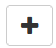 erstellt werden.

Der in einer Zelle aufgeführte Code wird mit ``Shift`` + ``Enter`` ausgeführt. Die dabei erstellten Variablen bleiben für weitere Rechenschritte erhalten.

Einige weitere nützliche Tastenkombinationen sind in der folgenden Tabelle aufgeführt.


Funktion | Tastenkombination
      :--|:---
neue Zelle oberhalb einfügen | ``a`` (im Navigationsmodus)
neue Zelle unterhalb einfügen | ``b`` (im Navigationsmodus)
Löschen einer Zelle | doppelt ``d`` (im Navigationsmodus)
Ausführen einer Zelle | ``Shift`` + ``Enter``

Für weitere Informationen zu Jupyter-Notebook sei beispielsweise auf die folgenden Internetseiten verwiesen:
* https://realpython.com/jupyter-notebook-introduction/
* https://jupyter-notebook.readthedocs.io/en/stable/index.html


## Importieren der Bibliotheken

Zu Beginn müssen die erforderlichen Bibliotheken importiert werden.
Dies geschieht, in dem die folgende Zelle ausgeführt wird.

Des weiteren wird in dieser Zelle die Formatierung der Plots auf die Deutsche Konvention mit Kommata als Dezimaltrenner eingestellt.

Falls eine lokale LaTeX-Installation vorhanden ist, können auch damit die Plots erstellt werden. Diese passen im Aussehen dann besser in die Protokolle. Dafür muss das ``False`` in der letzten Zeile auf ein ``True`` geändert werden.  

In [1]:
# Importieren der Bibliotheken
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import power
import scipy.odr as odr

# Verwendung von Kommata als Dezimaltrenner in den Abbildungen
import locale
locale.setlocale(locale.LC_NUMERIC, "de_DE")
plt.rcParams["axes.formatter.use_locale"] = True

# ggf. Verwendung von LaTeX zum Erstellen der Abbildungen
plt.rcParams["text.usetex"] =  False

##  Widerstandskennlinien

Das erste Beispiel ist das Auswerten einer Widerstandskennlinie.

Ausgang dafür sind paarweise gemessene Strom-Spannungs-Werte.
Als Beispieldaten dienen folgende Werte aus einem Laborbuch (der PG454):

Widerstand $R_1$

| $U$ in V | $I$ in mA |
|---|---|
| 2,54 | 6,2 |
| 4,16 | 10,2 |
| 5,65 | 13,8 |
| 7,68 | 18,8 |
| 9,44 | 23,2 |
| 11,82 | 29,1 |
| 12,89 | 31,8 |

Widerstand $R_2$

| $U$ in V | $I$ in mA |
|---|---|
| 3,05 | 3,4 |
| 5,33 | 6,4 |
| 7,87 | 9,4 |
| 9,72 | 11,6 |
| 12,36 | 14,8 |
| 13,44 | 16,1 |
| 15,0 | 18,1 |


Widerstand $R_3$

| $U$ in V | $I$ in mA |
|---|---|
| 2,97 | 2,4 |
| 4,51 | 3,6 |
| 6,14 | 4,9 |
| 7,48 | 6,0 |
| 9,03 | 7,2 |
| 10,44 | 8,3 |
| 11,75 | 9,4 |

Diese Werte müssen nun vom Laborbuch in Arrays übertragen werden. Dies geschieht in der folgenden Zelle. Hier sollten später  Eure gemessenen Werte eingesetzt werden.

In [2]:
# Messwerte für R_1
# U in V
U_1 = np.array([2.54,4.16,5.65,7.68,9.44,11.82,12.89])
# I in mA
I_1 = np.array([6.2, 10.2, 13.8, 18.8, 23.2, 29.1, 31.8])

# Messwerte für R_2
U_2 = np.array([3.05,5.33,7.87,9.72,12.36,13.44,15.0])
I_2 = np.array([3.4,6.4,9.4,11.6,14.8,16.1,18.1])

# Messwerte für R_3
U_3 = np.array([2.97,4.51,6.14,7.48,9.03,10.44,11.75])
I_3 = np.array([2.4,3.6,4.9,6.0,7.2,8.3,9.4])

Die gemessenen Werte weisen Unsicherheiten auf, welche in der Auswertung berücksichtigt werden müssen.

Im gezeigten Beispiel wurden die folgenden Messbereiche an den Multimetern (Voltcraft VC 155) gewählt:

* Spannung: 20 V
* Stromstärke: 200 mA

Das Handbuch des Multimeters gibt Auskunft über die Genauigkeit.
Die folgenden beiden Ausschnitte sind dafür relevant.

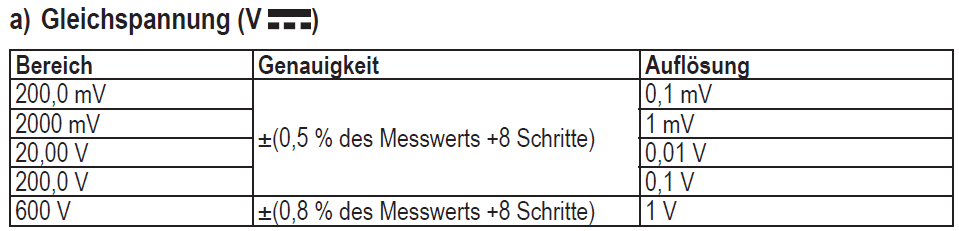

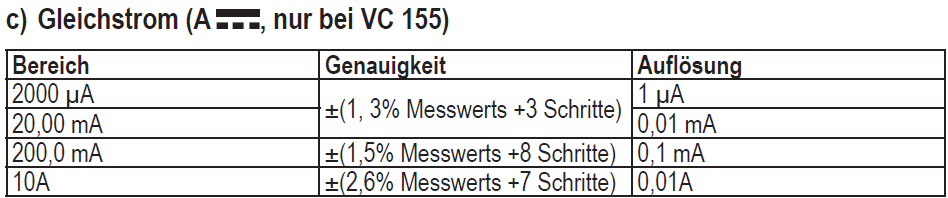

Er ergibt sich also für die Unsicherheiten:
* $\Delta U = 0{,}005\cdot U +0{,}08$ V
* $\Delta I = 0{,}015\cdot I +0{,}08$ mA

Nach dem Ohmschen Gesetz gilt für den ohmschen Widerstand $U=R\cdot I$.
Es besteht also ein linearer Zusammenhang zwischen Spannung $U$ und Stromstärke $I$, bei dem der Proportionalitätsfaktor (die Steigung) der Widerstand ist. An die Messwerte wird nun eine lineare Funktion angepasst. Für diese Anpassung wird die orthogonale Abstands Regression (Orthogonal distance regression) verwendet da diese Unsicherheiten in $x$- und $y$-Richtung mit einbeziehen kann.

Im Anschluss wird das Ergebnis graphisch dargestellt. Die Darstellung sollte dabei auch die Funktion und die Parameter der Anpassung (des Fits) enthalten. Die korrekte Rundung dieser Parameter geschieht von Hand. Dazu wird die Zelle einmal ausgeführt und der Widerstandswert samt Fehler ausgegeben. Im Anschluss wird dieser gerundet und das ``label`` des Plots entsprechend geändert.

Die Graphik wird als PDF-Datei gespeichert und kann in dieser Form direkt in LaTeX eingebunden werden.

R_1 =  406.8366939578369 \pm 0.5614004585789419 ) Ohm


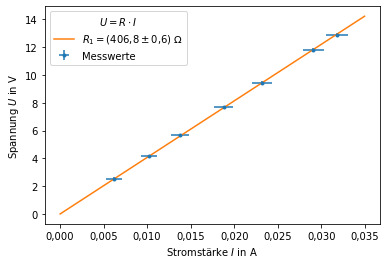

In [3]:
# Definition der Fit-Funktion
def linear_funktion(B, x):
    return B[0]*x

# Erstellen den linearen Modells für die odr-Funktion
linear = odr.Model(linear_funktion)

# Definition von Spannung und Stromstärke
# Die Stromstärke wird in A umgerechnet.
U = U_1
I = I_1/1000

# Berechnung der Unsicherheiten entsprechend der Erklärung (dem Handbuch)
U_err = 0.005*U + 0.08
I_err = 0.015*I + 0.8/1000

# Anpassen der Daten
mydata = odr.Data(I, U, wd=1./I_err**2, we=1./U_err**2)
myodr = odr.ODR(mydata, linear, beta0=[400.])
myoutput = myodr.run()

# Plotten der Messsdaten
plt.errorbar(I,U,fmt='.',yerr=U_err, xerr=I_err,label='Messwerte')

# Plotten des Fits
# Für das label muss das korrekt gerundete Ergebnis verwendet werden.
plt.plot(np.linspace(0,np.max(I)*1.1,10),
         linear_funktion(myoutput.beta,np.linspace(0,np.max(I)*1.1,10)),
         label='$R_1 = (406{,}8 \pm 0{,}6)$ Ω')

# Ausgabe des Ergebnis der Anpassung
print('R_1 = ',myoutput.beta[0],'\pm',myoutput.sd_beta[0], ') Ohm')

# Achsenbeschriftung und Legende erstellen
plt.xlabel('Stromstärke $I$ in A')
plt.ylabel('Spannung $U$ in V')
plt.legend(title='$U=R\cdot I$')

# Speichern der Abbildung als PDF
plt.savefig('Widerstand_R_1.pdf')

Beim Experiment wurde nun nicht nur ein Widerstand vermessen sondern drei. Alle Widerstandskennlinien sollen in einem Plot dargestellt werden. Um dies zu tun, werden die gleichen Schritte in einer Schleife (``for i in...``) für die drei Widerstände durchgeführt.

Vor Beginn der Schleife werden die Daten in Listen zusammengefasst. Auch hier müssen die Ergebnisse der Anpassungen händisch gerundet werden. 

R_1 = ( 406.8366939578369 \pm 0.5614004585789419 ) Ohm
R_2 = ( 834.815814542077 \pm 3.4657937419936355 ) Ohm
R_3 = ( 1252.2785719340418 \pm 1.7674706414863062 ) Ohm


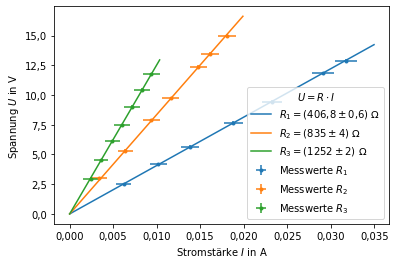

In [4]:
# Zusammenfassung der Daten in Listen
# Arrays der Spannugswerte
U_list = [U_1,U_2,U_3]
# Arrays der Stromstärken
I_list = [I_1,I_2,I_3]
# Namen der Widerstände
R_name = ['R_1','R_2','R_3']
# Gerundete Ergebnisse (diese müssen wieder händisch angepasst werden) 
R_ergebnis = [r'$(406{,}8 \pm 0{,}6)$ Ω','$(835 \pm 4)$ Ω','$(1252 \pm 2)$ Ω']
# Verwendete Farbe
Farbe = ['tab:blue','tab:orange','tab:green','tab:red']

# Definition der Fit-Funktion und Modell
def linear_funktion(B, x):
    return B[0]*x
linear = odr.Model(linear_funktion)

# Durchgehen der einzelnen Widerstände in einer Liste
for i in range(len(U_list)):
    # Definition von Spannung und Stromstärke
    # Die Stromstärke wird in A umgerechnet.
    U = U_list[i]
    I = I_list[i]/1000
    
    # Berechnung der Unsicherheiten entsprechend der Erklärung (dem Handbuch)
    U_err = 0.005*U + 0.08
    I_err = 0.015*I + 0.8/1000
    
    # Anpassen der Daten
    mydata = odr.Data(I, U, wd=1./I_err**2, we=1./U_err**2)
    myodr = odr.ODR(mydata, linear, beta0=[400.])
    myoutput = myodr.run()

    # Plotten der Messsdaten
    plt.errorbar(I,U,fmt='.',yerr=U_err, xerr=I_err, color=Farbe[i], label='Messwerte $'+R_name[i]+'$')
    
    # Plotten des Fits
    plt.plot(np.linspace(0,np.max(I)*1.1,10),
             linear_funktion(myoutput.beta,np.linspace(0,np.max(I)*1.1,10)),
             label='$'+R_name[i]+' = $'+R_ergebnis[i])
    
    # Ausgabe des Ergebnis der Anpassung
    print(R_name[i]+' = (',myoutput.beta[0],'\pm',myoutput.sd_beta[0], ') Ohm')

# Achsenbeschriftung und Legende erstellen
plt.xlabel('Stromstärke $I$ in A')
plt.ylabel('Spannung $U$ in V')
plt.legend(title='$U=R\cdot I$')

# Speichern der Abbildung als PDF
plt.savefig('Widerstand.pdf')

## Kondensatorkennlinie

Ein weiteres Experiment, welches oft beim Erstsemesterversuch durchgeführt wird und eine quantitative Auswertung erfordert ist das Auf- und Entladeverhalten eines Kondensators. In diesem Beispiel ist ein Kondesator über einen Widerstand mit einer Spannungsquelle verbunden, wie in der folgenden Abbildung (geänderte Abbildung der PG454)  zu erkennen ist. Über einen Wechselschalter kann zwischen dem Auf- und Entladevorgang gewechselt werden. Mit einem Oszilloskop wird über die Zeit die Spannung am Kondensator gemessen.

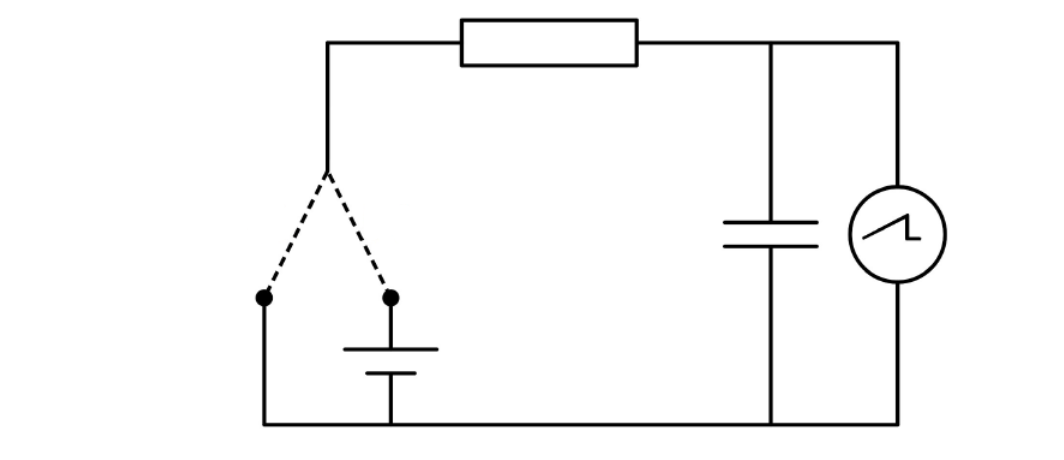

### Import der Daten

Die Datei ``condensator.csv`` enthält das Ergebnis einer solchen Messung mit einem digitalen Oszilloskop. Es handelt sich dabei um eine CSV-Datei (Comma-separated values), also eine Textdatei, in welcher mit einem Trennzeichen (delimiter) getrennt Zahlen stehen. In diesem Fall sind die Zahlen mit einem Komma getrennt und die ersten beide Zeilen enthalten keine Messwerte.

Der erste Schritt bei der Auswertung ist der Import der Messdaten. Hierfür wird eine ``numpy``-Funktion verwendet. Dateiname, Trennzeichen und die Anzahl der zu überspringenden ersten Zeilen werden der Funktion als Argumente übergeben.

In [5]:
# Import der Messdaten
data = np.genfromtxt('condensator.csv',
                     delimiter=',',
                     skip_header=2)
# Ausgabe des Arrays
data

array([[ 0.000e+00, -2.000e+00,        nan],
       [ 1.000e+00,  2.000e+00,        nan],
       [ 2.000e+00,  2.000e+00,        nan],
       ...,
       [ 1.197e+03,  2.000e+00,        nan],
       [ 1.198e+03, -2.000e+00,        nan],
       [ 1.199e+03,  2.000e+00,        nan]])

### Bereichswahl

Beim ausgegebenen Array ist die erste Spalte der Zeitindex, die zweite Spalte der Spannungswert und die dritte Spalte ein fehlerhafter Import (nan - not a number) der für den weiteren Verlauf keine Rolle spielt.

Aus den Aufzeichnungen im Protokoll geht hervor, dass ein Zeitschritt 5 ms entspricht. Die Spannung ist in Schritten von 10 mV angegeben.

Auf- und Entladekurve sollen in diesem Beispiel separat angepasst werden. Im nächsten Schritt werden die Messdaten also dargestellt und die zeitlichen Grenzen für die beiden Prozesse gesetzt. 

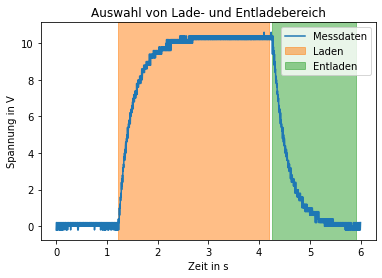

In [6]:
# Die Skalierungsfaktoren der Messdaten werden definiert.
delta_t = 0.005
faktor_U = 0.1

# Spannung (in A) und Zeit (in s) werden aus den importierten Messdaten bestimmt.
U = data[:,1]*faktor_U
t = data[:,0]*delta_t

# Die zeitlichen Grenzen für Auf- und Entladevorgang werden festgelegt.
# Das sollte mit Euren Messdaten erneut geschehen. Ihr könnt die Daten ändern, plotten und dies entsprechend
# oft wiederholen, bis die Grenzen an der richtigen Stelle sind.
laden_start    = 1.22
laden_stop     = 4.20
entladen_start = 4.25
entladen_stop  = 5.9

# Darstellen der Messwerte
plt.plot(t,U,label='Messdaten')
plt.xlabel('Zeit in s')
plt.ylabel('Spannung in V')
plt.title('Auswahl von Lade- und Entladebereich')

# Darstellen der gewählten Bereiche
plt.axvspan(laden_start, laden_stop, alpha=0.5, color='tab:orange',label='Laden')
plt.axvspan(entladen_start, entladen_stop, alpha=0.5, color='tab:green',label='Entladen')

# Erstellen der Legende
plt.legend()

# Speichern der Abbildung als PDF
plt.savefig('Bereichswahl.pdf')

### Ladevorgang
Für den Ladevorgang gilt nach der Theorie der Verlauf

$U(t)=U_0\left[1-\exp\left(-\frac{t}{\tau}\right)\right]$

mit

$\tau = RC$

welcher im Folgenden an die Messwerte angepasst wird. Hierfür wird zu Beginn der zuvor definierte Bereich aus den Messwerten herausgenommen und Anschluss mit der ``curve_fit``-Funktion angepasst. Das Ergebnis wird graphisch dargestellt.

U_0: ( 10.281224642791011 ± 0.008639502780473228 ) V
tau: ( 0.2782555052298891 ± 0.001418489964244769 ) s


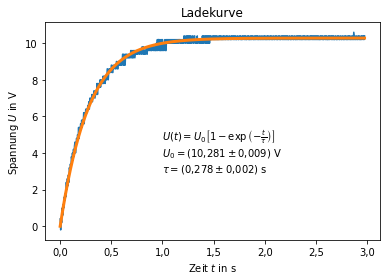

In [7]:
# Extraktion des der Daten des gewählten Bereichs
start_index_laden = np.where(t>laden_start)[0][0]
stop_index_laden = np.where(t>laden_stop)[0][0]
U_fit_laden = U[start_index_laden:stop_index_laden]
t_fit_laden = t[0:len(U_fit_laden)]

# Definition des theoretischen Verlaufs
def lade_kurve(t,U_0,tau):
    return U_0*(1-np.exp(-t/tau))

# Anpassen / Fitten
params_laden, pcov = curve_fit(lade_kurve, t_fit_laden, U_fit_laden)

# Extraktion der Ergebnisse der Anpassung
# Ergebnisse für U_0 und tau
U_0_laden = params_laden[0]
tau_laden = params_laden[1]
# Unsicherheiten für U_0 und tau
U_0_err_laden = np.sqrt(pcov[0,0])
tau_err_laden = np.sqrt(pcov[1,1])

# Graphische Darstellung der Messwerte und der Anpassung
plt.plot(t_fit_laden, U_fit_laden)
plt.plot(t_fit_laden,lade_kurve(t_fit_laden,*params_laden),linewidth=3)

# Abbildungsbeschriftungen
plt.xlabel('Zeit $t$ in s')
plt.ylabel('Spannung $U$ in V')
plt.title('Ladekurve')

# Ausgabe der Ergebnisse
print('U_0: (', U_0_laden , '±', U_0_err_laden, ') V')
print('tau: (', tau_laden , '±', tau_err_laden, ') s')

# Ausgabe der händisch gerundeten Ergebnisse (diese müssen händisch angepasst werden) 
information_string_laden = r"""$U(t) = U_0\left[1-\exp\left(-\frac{t}{\tau}\right)\right]$
$U_0 = (10{,}281 \pm 0{,}009)$ V
$\tau = (0{,}278 \pm 0{,}002)$ s"""
plt.text(1.0,3,information_string_laden)

# Speichern der Abbildung als PDF
plt.savefig('Ladekurve.pdf')

### Entladevorgang
Für den Entladevorgang gilt nach der Theorie der Verlauf

$U(t)=U_0\left[\exp\left(-\frac{t}{\tau}\right)\right]$

mit

$\tau = RC$

welcher im Folgenden im gleichen Prozedere wie der Ladevorgang an die Messwerte angepasst wird.

U_0: ( 10.47609785345153 ± 0.052987992347570706 ) V
tau: ( 0.28489622728995695 ± 0.0020565580541415766 ) s


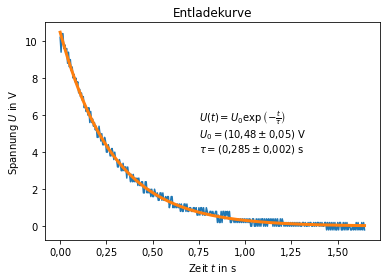

In [8]:
# Extraktion des der Daten des gewählten Bereichs
start_index_entladen = np.where(t>entladen_start)[0][0]
stop_index_entladen = np.where(t>entladen_stop)[0][0]
U_fit_entladen = U[start_index_entladen:stop_index_entladen]
t_fit_entladen = t[start_index_entladen:stop_index_entladen]-np.min(t[start_index_entladen:stop_index_entladen])

# Definition des theoretischen Verlaufs
def entlade_kurve(t,U_0,tau):
    return U_0*np.exp(-t/tau)

# Anpassen / Fitten
params_entladen, pcov = curve_fit(entlade_kurve, t_fit_entladen, U_fit_entladen)

# Extraktion der Ergebnisse der Anpassung
# Ergebnisse für U_0 und tau
U_0_entladen = params_entladen[0]
tau_entladen = params_entladen[1]
# Unsicherheiten für U_0 und tau
U_0_err_entladen = np.sqrt(pcov[0,0])
tau_err_entladen = np.sqrt(pcov[1,1])

# Graphische Darstellung der Messwerte und der Anpassung
plt.plot(t_fit_entladen, U_fit_entladen)
plt.plot(t_fit_entladen,entlade_kurve(t_fit_entladen,*params_entladen),linewidth=3)

# Abbildungsbeschriftungen
plt.xlabel('Zeit $t$ in s')
plt.ylabel('Spannung $U$ in V')
plt.title('Entladekurve')

# Ausgabe der Ergebnisse
print('U_0: (', U_0_entladen , '±', U_0_err_entladen, ') V')
print('tau: (', tau_entladen , '±', tau_err_entladen, ') s')

# Ausgabe der händisch gerundeten Ergebnisse (diese müssen händisch angepasst werden) 
information_string_entladen = r"""$U(t) = U_0\exp\left(-\frac{t}{\tau}\right)$
$U_0 = (10{,}48 \pm 0{,}05)$ V
$\tau = (0{,}285 \pm 0{,}002)$ s"""
plt.text(0.75,4,information_string_entladen)

# Speichern der Abbildung als PDF
plt.savefig('Entladekurve.pdf')

### Kombinierte Darstellung

Im letzten Schritt werden die separaten Auswertungen für den Lade- und Entladevorgang in einer Abbildung zusammengefasst.

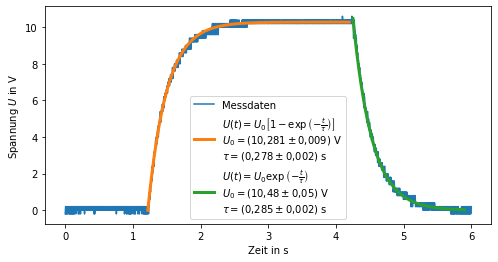

In [9]:
# Erstellen der Abbildung (diese ist breiter, als normal, um für die Legende ausreichend platz zu bieten)
fig, ax = plt.subplots(1,figsize=(8,4))

# Darstellung der Messwerte
ax.plot(t,U,label='Messdaten')

# Abbildungsbeschriftungen
ax.set_xlabel('Zeit in s')
ax.set_ylabel('Spannung $U$ in V')

# Plotten der Ladekurve, diese is zeitlich versetzt um die Startzeit des Ladevorgangs
ax.plot(t_fit_laden+laden_start,lade_kurve(t_fit_laden,*params_laden),linewidth=3,label=information_string_laden)

# Plotten der Entladekurve, diese is zeitlich versetzt um die Startzeit des Entladevorgangs
ax.plot(t_fit_entladen+entladen_start,entlade_kurve(t_fit_entladen,*params_entladen),linewidth=3,label=information_string_entladen)

# Erstellen der Legende
ax.legend(frameon=True)

# Speichern der Abbildung als PDF
plt.savefig('Kondensator.pdf')